## Выберите вариант

In [17]:
surname = "Марчук"

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  4
Задача № 1, шаг 11 - вариант:  2
задача № 2 - вариант:  2


# Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Governance Indicators, WGI)

## Загружаем набор данных

In [72]:
from google.colab import files

# Загружаем файл данных
uploaded = files.upload()

# Сохраняем загруженный файл на диск
for filename in uploaded.keys():
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

Saving wgidataset.xlsx to wgidataset.xlsx


## 1. Загружаем данные в DataFrame

---



In [73]:
# Теперь мы можем загрузить данные в DataFrame
import pandas as pd

# загруженный файл в формате Excel (xlsx)
regions = pd.read_excel('/content/regions.xlsx')
#загруженный файл имеет формат sta
#wgidataset = pd.read_stata('/content/wgidataset.dta')
df = pd.read_excel("/content/wgidataset.xlsx", 'ControlofCorruption', skiprows=14,)
# Split the DataFrame
part1 = df.iloc[:, :2]  # First two columns
part2 = df.iloc[:, 2:]  # Rest of the columns

column_groups = [part2.columns[i:i+6] for i in range(0, len(part2.columns), 6)]
separate_datasets = []
for group in column_groups:
    separate_datasets.append(df[group])
# Initialize an empty list to store concatenated datasets
concatenated_datasets = []

# Concatenate part1 with each dataset separately
for dataset in separate_datasets:
    concatenated_dataset = pd.concat([part1, dataset], axis=1)
    concatenated_datasets.append(concatenated_dataset)
new_column_names = ['Estimate', 'StdErr', 'NumSrc', 'Rank', 'Lower', 'Upper']
# Loop through each dataset
for dataset in concatenated_datasets:
    # Identify the last 5 columns
    dataset.columns = list(dataset.columns[:-6]) + new_column_names


In [84]:
import pandas as pd

# Example data
years = [1996, 1998, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Create DataFrames with unique identifiers (e.g., index)
dfs = [df.assign(Year=year) for year, df in zip(years, concatenated_datasets)]

# Concatenate DataFrames
wgidataset = pd.concat(dfs, ignore_index=True)

wgidataset.head()

,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Year
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,1996
1,Andorra,ADO,1.318143,0.480889,1.0,87.096771,72.043015,96.774193,1996
2,Afghanistan,AFG,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,1996
3,Angola,AGO,-1.167702,0.262077,4.0,9.677420,0.537634,27.419355,1996
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,1996


In [85]:
# Теперь выводим регионы DataFrame Regions dataset
regions

,Country,Code,Region
0,Afghanistan,AFG,AP
1,Albania,ALB,ECA
2,Algeria,DZA,MENA
3,Angola,AGO,SSA
4,Argentina,ARG,AME
...,...,...,...
175,Venezuela,VEN,AME
176,Vietnam,VNM,AP
177,Yemen,YEM,MENA
178,Zambia,ZMB,SSA


## 2. Отсортируем данные по убыванию индекса Data Frame

In [86]:
# Сортируем данные по показателю индекса WGI в порядке возрастания, чтобы получить ранги
sorted_wgidataset = wgidataset.sort_values(by='Rank', ascending=False)



In [87]:
# Отображаем отсортированный фрейм данных wgidataset
sorted_wgidataset

,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Year
4548,Denmark,DNK,2.236469,0.149797,10.0,100.0,95.714287,100.0,2020
1980,Denmark,DNK,2.376409,0.182742,8.0,100.0,96.116508,100.0,2008
2194,Denmark,DNK,2.435494,0.167893,9.0,100.0,97.607658,100.0,2009
2408,Denmark,DNK,2.352359,0.153291,10.0,100.0,97.619049,100.0,2010
4762,Denmark,DNK,2.333753,0.162209,10.0,100.0,97.142860,100.0,2021
...,...,...,...,...,...,...,...,...,...
4636,Niue,NIU,NaN,NaN,NaN,NaN,NaN,NaN,2020
4714,Netherlands Antilles (former),ANT,NaN,NaN,NaN,NaN,NaN,NaN,2021
4750,Cook Islands,COK,NaN,NaN,NaN,NaN,NaN,NaN,2021
4850,Niue,NIU,NaN,NaN,NaN,NaN,NaN,NaN,2021


## 3. Отображаем данные по индексу WGI за 2021 год в виде горизонтального столбчатого графика (rank).

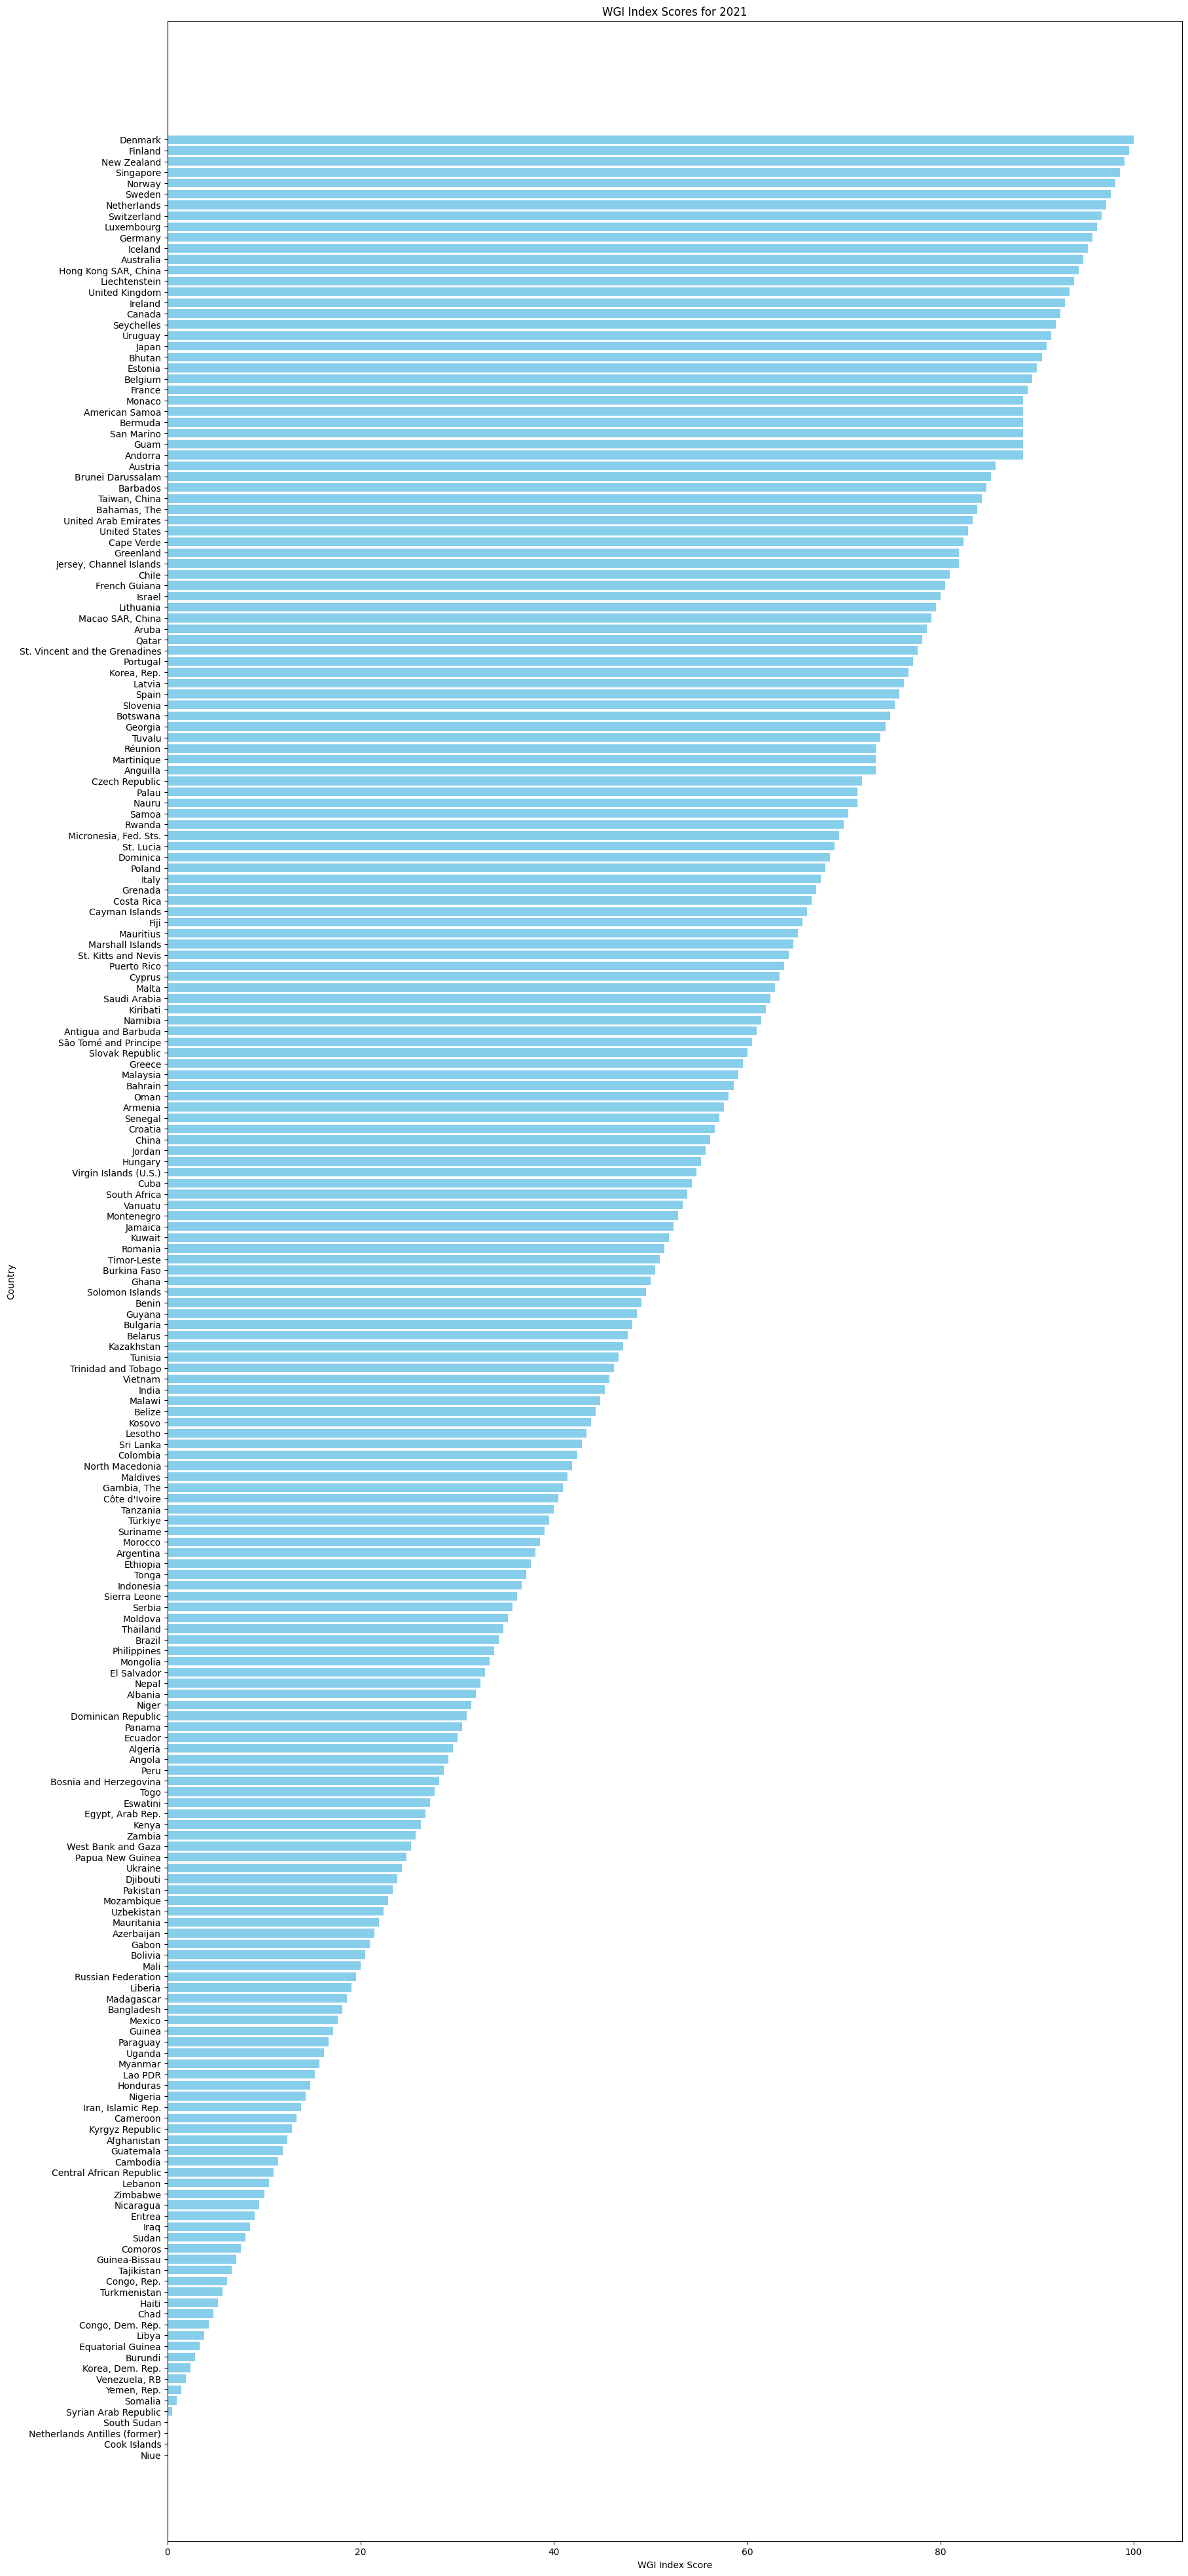

In [88]:
import matplotlib.pyplot as plt

# Отфильтруйте набор данных, чтобы включить в него данные только за 2021 год
df_2021 = sorted_wgidataset[sorted_wgidataset['Year'] == 2021]


# Построение
plt.figure(figsize=(20, 50))
plt.barh(df_2021['Country/Territory'], df_2021['Rank'], color='skyblue')
plt.xlabel('WGI Index Score')
plt.ylabel('Country')
plt.title('WGI Index Scores for 2021')
plt.gca().invert_yaxis()  # Инвертируйте ось y, чтобы получить самый высокий ранг сверху
plt.show()



## 4. Создание фрейма данных из исходного фрейма для Middle East and North Africa региона

In [91]:
# 1 Отфильтруйте фрейм данных, чтобы сохранить только те строки,
# в которых значение в 'column_name' соответствует выбранному значению
merged_df = pd.merge(regions, sorted_wgidataset, on='Code')
df_ap_region = merged_df[merged_df['Region'] == 'AP']
# # Теперь наш набор данных содержит только строки из набора данных wgi,
# которые относятся только к странам Азиатско-Тихоокеанского региона
df_ap_region.head()

,Country,Code,Region,Country/Territory,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Year
0,Afghanistan,AFG,AP,Afghanistan,-1.152327,0.182761,8.0,12.380953,4.761905,20.952381,2021
1,Afghanistan,AFG,AP,Afghanistan,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018,2022
2,Afghanistan,AFG,AP,Afghanistan,-1.176012,0.324013,2.0,8.021390,0.000000,33.689838,1998
3,Afghanistan,AFG,AP,Afghanistan,-1.350647,0.213201,5.0,6.403941,0.000000,15.270936,2004
4,Afghanistan,AFG,AP,Afghanistan,-1.419499,0.154593,10.0,5.714286,1.428571,11.904762,2019


## 5. Выводим данные DataFrame'a

In [95]:
# # Теперь наш набор данных содержит только строки из набора данных wgi,
# которые относятся только к странам Азиатско-Тихоокеанского региона
df_ap_region

,Country,Code,Region,Country/Territory,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Year
0,Afghanistan,AFG,AP,Afghanistan,-1.152327,0.182761,8.0,12.380953,4.761905,20.952381,2021
1,Afghanistan,AFG,AP,Afghanistan,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018,2022
2,Afghanistan,AFG,AP,Afghanistan,-1.176012,0.324013,2.0,8.021390,0.000000,33.689838,1998
3,Afghanistan,AFG,AP,Afghanistan,-1.350647,0.213201,5.0,6.403941,0.000000,15.270936,2004
4,Afghanistan,AFG,AP,Afghanistan,-1.419499,0.154593,10.0,5.714286,1.428571,11.904762,2019
...,...,...,...,...,...,...,...,...,...,...,...
4171,Vietnam,VNM,AP,Vietnam,-0.628040,0.128209,12.0,30.476191,20.000000,42.380951,2017
4172,Vietnam,VNM,AP,Vietnam,-0.711533,0.145354,14.0,28.640778,17.961164,37.864079,2008
4173,Vietnam,VNM,AP,Vietnam,-0.756660,0.161213,9.0,26.600985,15.270936,35.467979,2004
4174,Vietnam,VNM,AP,Vietnam,-0.729582,0.147620,11.0,25.853659,17.073172,40.000000,2005


## 6. Построим графики индекса WGI за 1996-2021 годы для стран Азиатско-Тихоокеанского региона (rank).

In [94]:
# создать DF с 1996 по 2021 год
df_1996_2021 = df_ap_region[['Country/Territory',"Year", "Estimate","Rank"]]
df_1996_2021 = df_1996_2021[df_1996_2021["Year"] != 2022]
df_1996_2021

,Country/Territory,Year,Estimate,Rank
0,Afghanistan,2021,-1.152327,12.380953
2,Afghanistan,1998,-1.176012,8.021390
3,Afghanistan,2004,-1.350647,6.403941
4,Afghanistan,2019,-1.419499,5.714286
5,Afghanistan,2015,-1.354240,5.714286
...,...,...,...,...
4171,Vietnam,2017,-0.628040,30.476191
4172,Vietnam,2008,-0.711533,28.640778
4173,Vietnam,2004,-0.756660,26.600985
4174,Vietnam,2005,-0.729582,25.853659


In [96]:
# Pivot the data frame
pivoted_df = df_1996_2021.pivot_table(columns='Country/Territory', index='Year', values='Estimate')

# Rename the columns
pivoted_df.columns = [f'Estimate.{col}' for col in pivoted_df.columns]

pivoted_df.head()

,Estimate.Afghanistan,Estimate.Australia,Estimate.Bangladesh,Estimate.Bhutan,Estimate.Cambodia,Estimate.China,Estimate.Fiji,"Estimate.Hong Kong SAR, China",Estimate.India,Estimate.Indonesia,...,Estimate.Pakistan,Estimate.Papua New Guinea,Estimate.Philippines,Estimate.Singapore,Estimate.Solomon Islands,Estimate.Sri Lanka,"Estimate.Taiwan, China",Estimate.Thailand,Estimate.Vanuatu,Estimate.Vietnam
Year,,,,,,,,,,,,,,,,,,,,,
1996,-1.291705,1.877356,-0.969682,0.942838,-1.019842,-0.271190,0.659303,1.444894,-0.381090,-0.864106,...,-1.220030,-0.433467,-0.358872,2.107434,0.340782,-0.056539,0.580821,-0.361192,0.216309,-0.489799
1998,-1.176012,1.798130,-0.773011,0.883641,-0.988312,-0.353955,0.663798,1.303382,-0.258727,-1.160077,...,-1.080915,-0.698878,-0.381950,2.057286,0.361923,-0.083365,0.583798,-0.141036,0.238910,-0.491154
2000,-1.271724,1.862088,-1.212083,0.574340,-0.967183,-0.208549,0.630552,1.292820,-0.403302,-0.908694,...,-0.894910,-0.786501,-0.527594,2.139873,0.177562,-0.199229,0.696333,-0.230174,0.227800,-0.584863
2002,-1.251137,1.761436,-1.449087,0.449922,-0.990784,-0.557898,0.610876,1.666942,-0.555382,-1.137303,...,-0.955986,-0.947748,-0.538532,2.262734,0.182450,-0.216593,0.619227,-0.338848,0.230140,-0.560991
2003,-1.344180,1.895287,-1.541721,1.087011,-0.989836,-0.395265,0.276082,1.800160,-0.456321,-0.979824,...,-0.804457,-0.813448,-0.635372,2.169168,0.214312,-0.272020,0.814145,-0.196024,0.262945,-0.490873


<Axes: title={'center': 'WGI за 1996-2022 Asia Pacific estimate'}, xlabel='Year'>

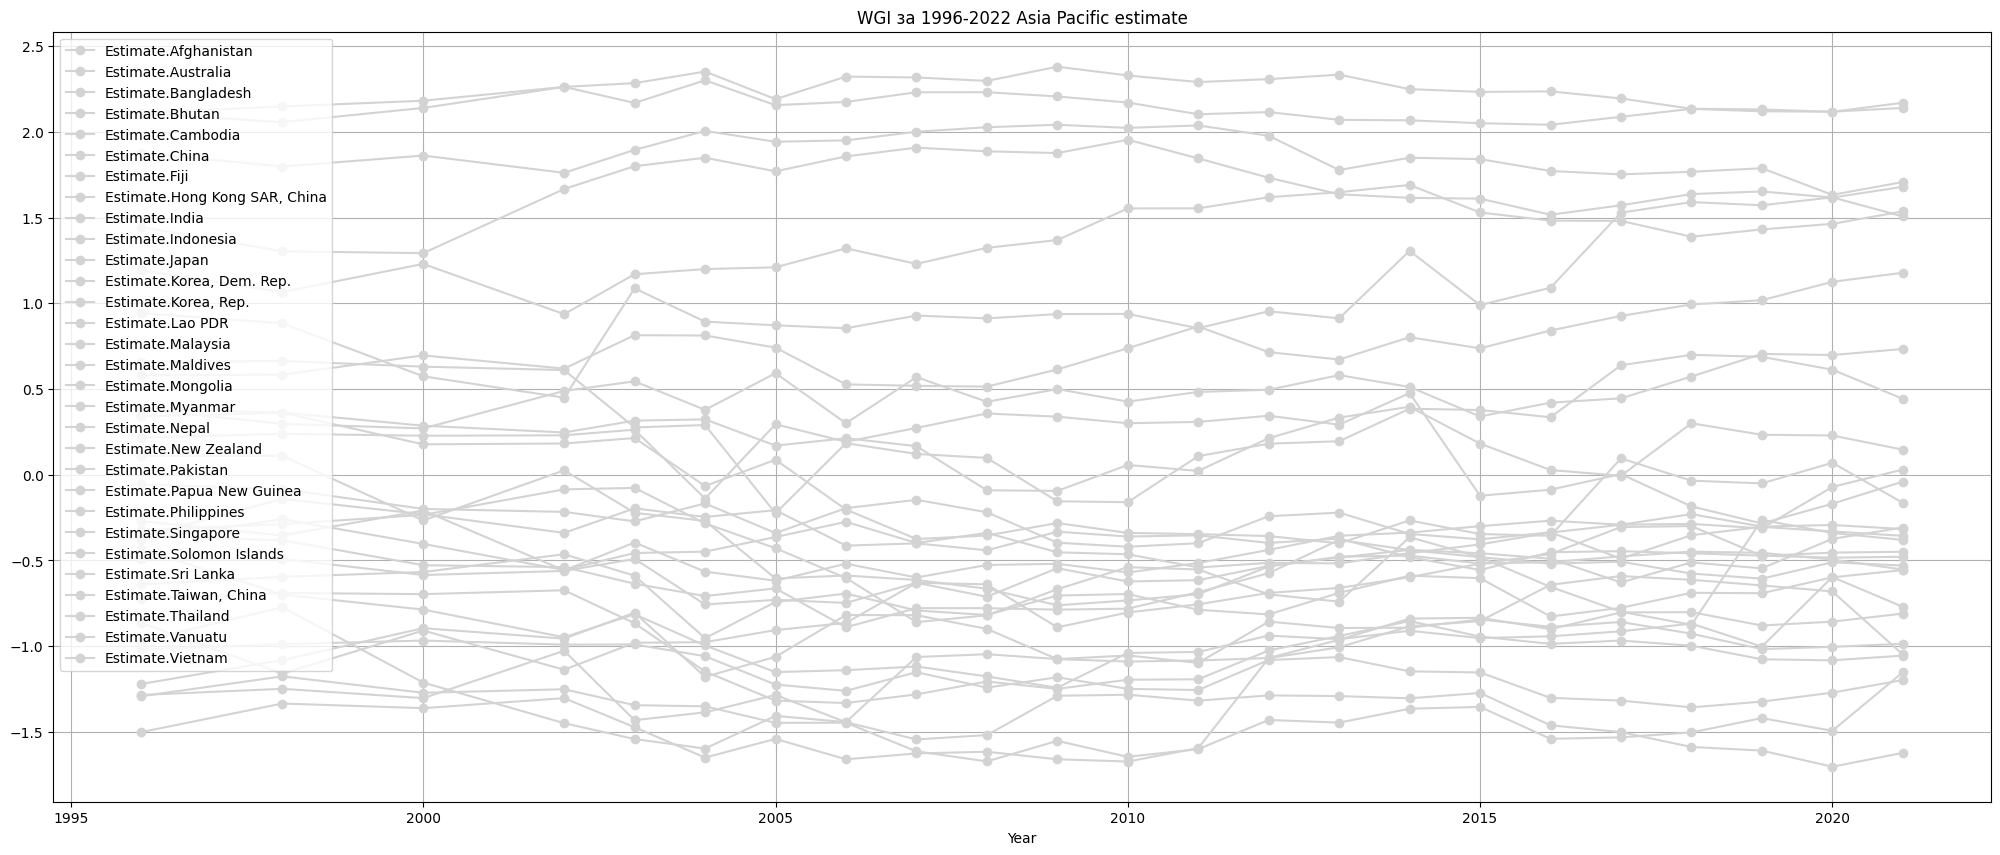

In [98]:
pivoted_df.plot(grid=1,figsize=(25,10),title='WGI за 1996-2022 Asia Pacific estimate',marker='o',color='lightgrey')

## 7. Cтраны с самыми высокими и самыми низкими значениями WGI для варианта "Middle East and North Africa" на 2021 год (rank)

In [102]:
# Сохранем только строки с 2021 годом
df_2021 = df_1996_2021[df_1996_2021['Year'] == 2021]
# Находим страну с максимальным PVE
max_pve_country = df_2021.loc[df_2021['Estimate'].idxmax()]['Country/Territory']
# Находим страну с минимальным PVE
min_pve_country = df_2021.loc[df_2021['Estimate'].idxmin()]['Country/Territory']

In [103]:
#страна с максимальным PVE
max_pve_country

'New Zealand'

In [104]:
#страна с минимальным PVE
min_pve_country

'Korea, Dem. Rep.'

## 8. Средние значения по региону за каждый год с 1996 по 2021 год (rank)

In [105]:
print(df_1996_2021.head())

  Country/Territory  Year  Estimate       Rank
0       Afghanistan  2021 -1.152327  12.380953
2       Afghanistan  1998 -1.176012   8.021390
3       Afghanistan  2004 -1.350647   6.403941
4       Afghanistan  2019 -1.419499   5.714286
5       Afghanistan  2015 -1.354240   5.714286


In [107]:
# группируем данные по годам и рассчитываем среднее значение для каждого года
average_values_by_year = df_1996_2021.groupby('Year')['Estimate'].mean().reset_index()

print(average_values_by_year)

# average_values_by_year = df_1996_2021.groupby('year').mean().reset_index()

    Year  Estimate
0   1996  0.005390
1   1998  0.004409
2   2000 -0.035114
3   2002 -0.043584
4   2003 -0.024761
5   2004 -0.117873
6   2005 -0.141014
7   2006 -0.154418
8   2007 -0.139037
9   2008 -0.156720
10  2009 -0.154840
11  2010 -0.140798
12  2011 -0.131607
13  2012 -0.063054
14  2013 -0.046824
15  2014  0.012366
16  2015 -0.049325
17  2016 -0.073050
18  2017 -0.025685
19  2018 -0.012606
20  2019 -0.013031
21  2020  0.016584
22  2021  0.016733


In [108]:
# среднее значение по региону за год
average_values_by_year

,Year,Estimate
0,1996,0.005390
1,1998,0.004409
2,2000,-0.035114
3,2002,-0.043584
4,2003,-0.024761
5,2004,-0.117873
6,2005,-0.141014
7,2006,-0.154418
8,2007,-0.139037
9,2008,-0.156720


## 9. Постройте график индекса WGI за 1996-2021 годы для стран вашего региона и выберите страны с самыми высокими и самыми низкими значениями WGI на 2021 год, а также отобразите среднее значение для региона и Российской Федерации.

In [111]:
# Российская Федерация
df_russia = wgidataset[wgidataset['Country/Territory'] == "Russian Federation"]
df_russia = df_russia[df_russia['Year'] != 2022]
df_russia = df_russia [['Country/Territory',"Year", "Estimate"]]

# DF страны с максимальным PVE
df_max = df_1996_2021[df_1996_2021['Country/Territory'] == max_pve_country]
# DF страны с минимальным PVE
df_min = df_1996_2021[df_1996_2021['Country/Territory'] == min_pve_country]

In [112]:
df_min

,Country/Territory,Year,Estimate,Rank
2016,"Korea, Dem. Rep.",2002,-1.026663,13.756614
2017,"Korea, Dem. Rep.",2015,-1.272866,9.047619
2018,"Korea, Dem. Rep.",2005,-1.284464,8.292683
2019,"Korea, Dem. Rep.",2014,-1.304090,7.211538
2020,"Korea, Dem. Rep.",2013,-1.291033,6.635071
2021,"Korea, Dem. Rep.",2012,-1.287029,6.161138
2022,"Korea, Dem. Rep.",2016,-1.461490,5.714286
2023,"Korea, Dem. Rep.",1998,-1.248695,5.347594
2024,"Korea, Dem. Rep.",2010,-1.283197,5.238095
2025,"Korea, Dem. Rep.",1996,-1.284347,4.838710


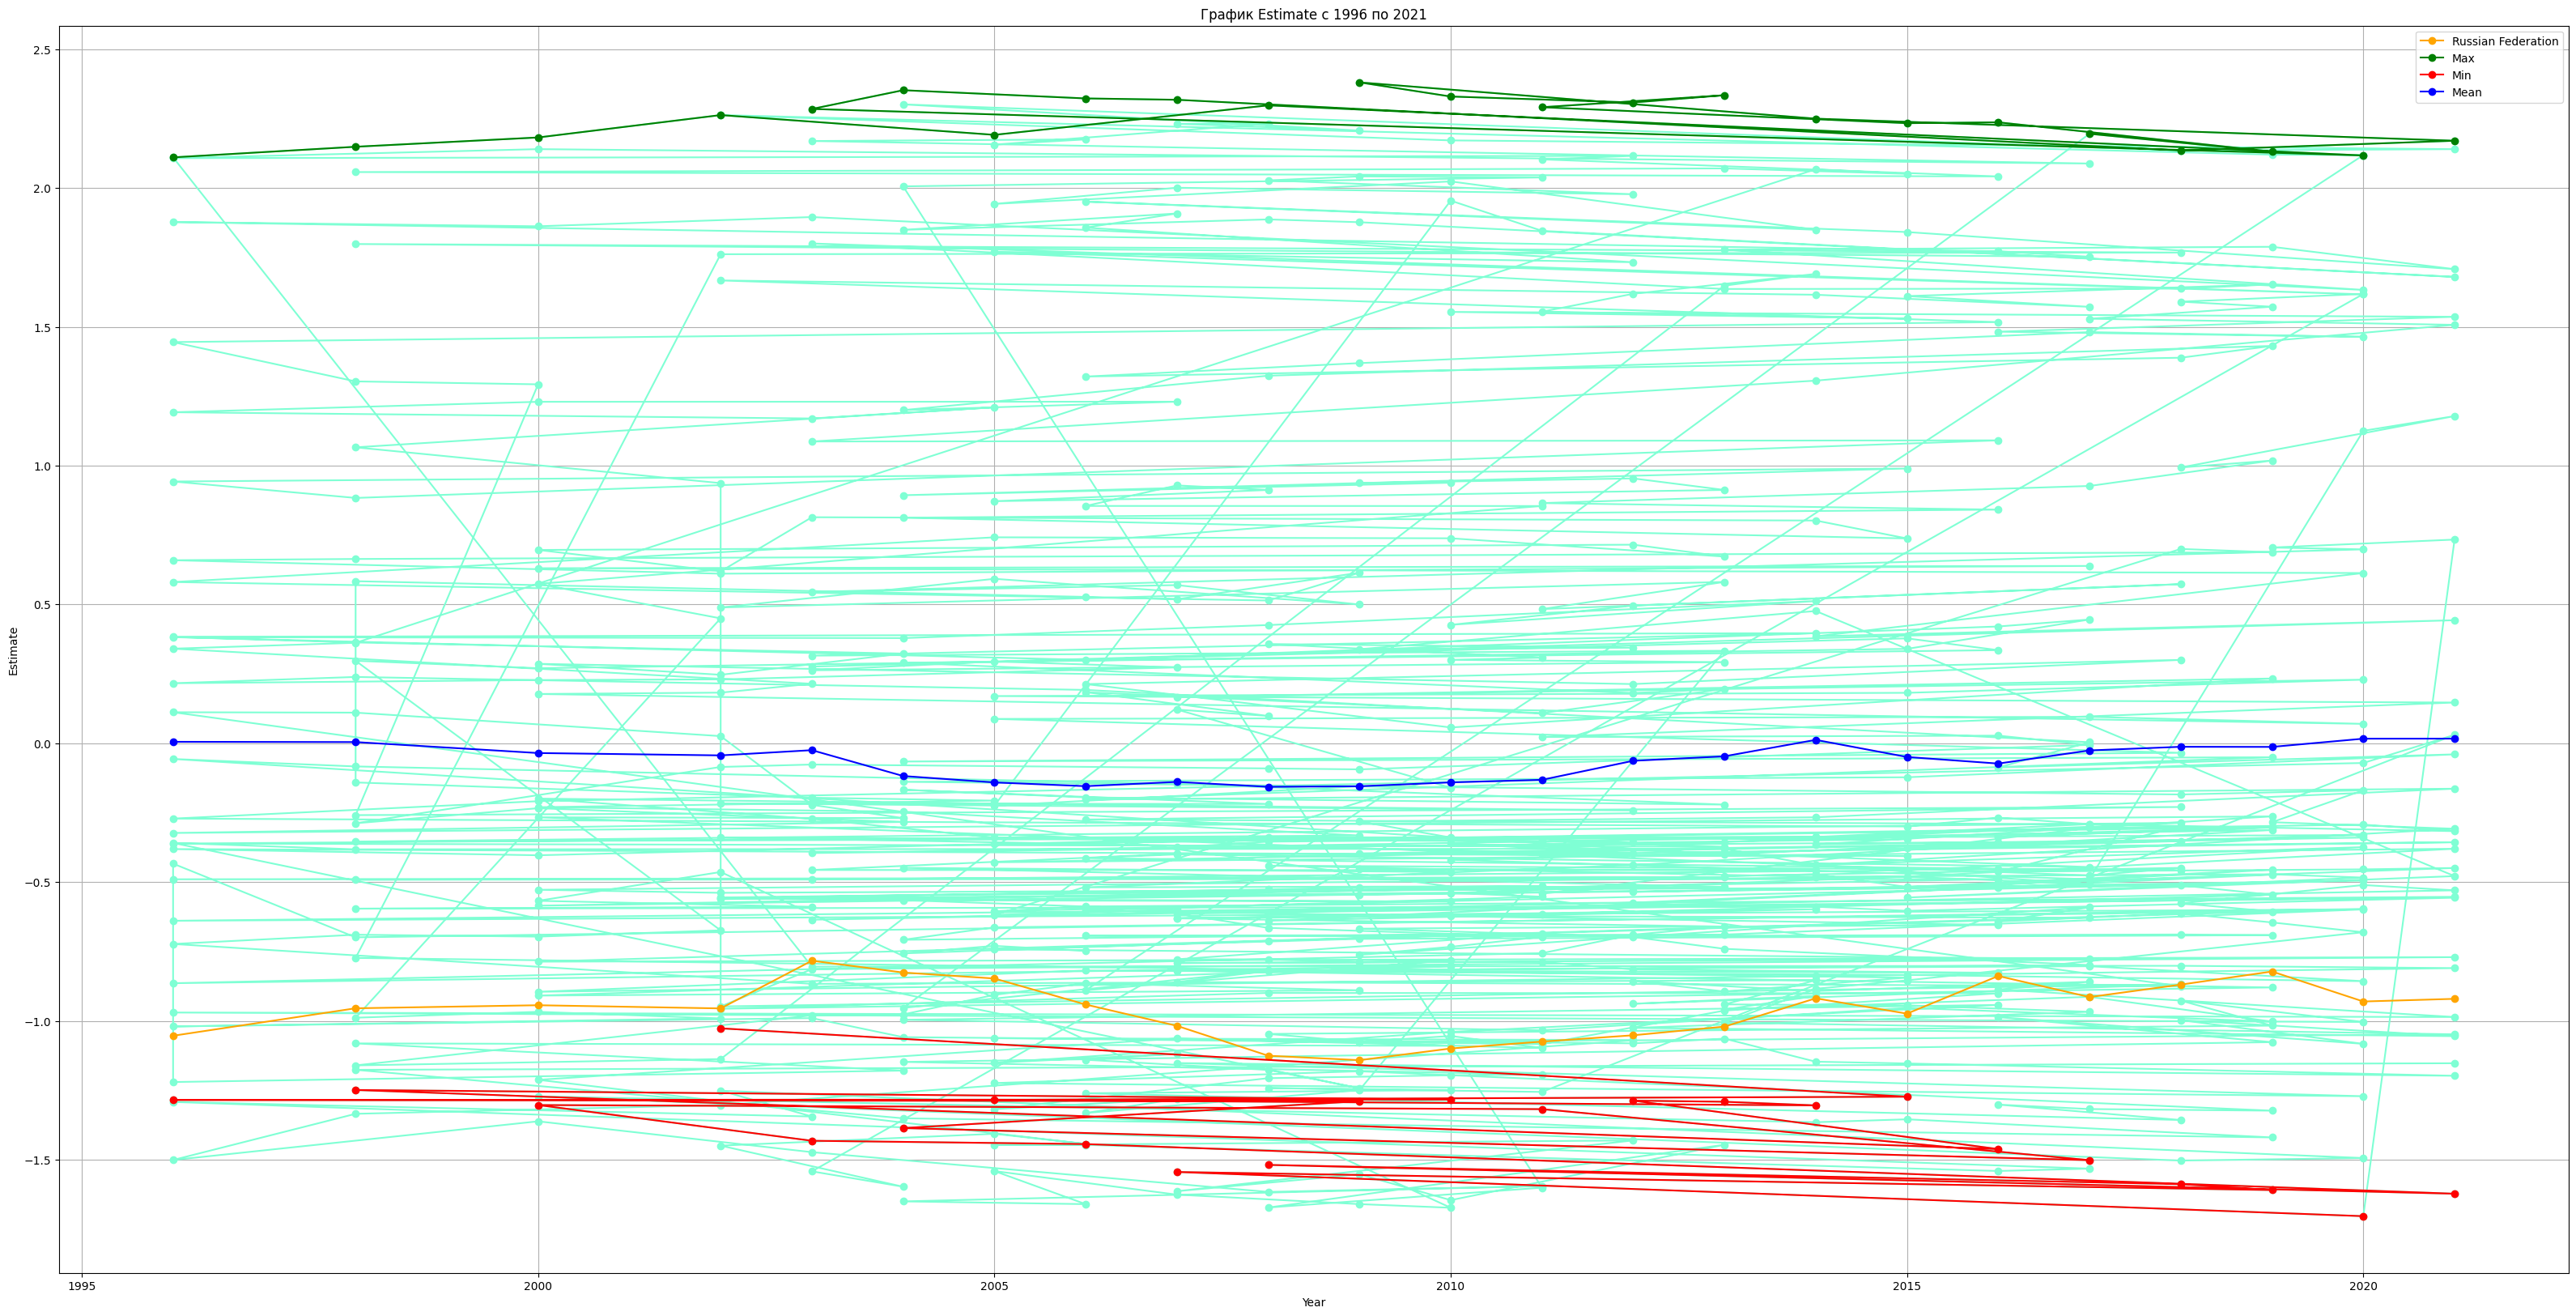

In [113]:
# Рисуем график
plt.figure(figsize=(40, 20))
plt.plot(df_1996_2021['Year'], df_1996_2021['Estimate'], marker='o', linestyle='-',color='aquamarine')
plt.plot(df_russia['Year'], df_russia['Estimate'], marker='o', linestyle='-',color='orange',label='Russian Federation')
plt.plot(df_max['Year'], df_max['Estimate'], marker='o', linestyle='-',color='green',label='Max')
plt.plot(df_min['Year'], df_min['Estimate'], marker='o', linestyle='-',color='red',label='Min')
plt.plot(average_values_by_year['Year'], average_values_by_year['Estimate'], marker='o', linestyle='-',color='blue',label='Mean')
plt.xlabel('Year')
plt.ylabel('Estimate')
plt.title('График Estimate с 1996 по 2021')
plt.grid(True)
plt.legend()
plt.show()

## 11. Изменения значения показателя rank с 1996 по 2022 год

In [117]:
# Создаем DF(Датафрейм) с 1996 по 2021 основанном на rank
df_1996_2021 = wgidataset[["Country/Territory","Year", "Rank"]]
df_1996_2021_rank = df_1996_2021[df_1996_2021["Year"] != 2022]
df_1996_2021_rank

,Country/Territory,Year,Rank
0,Aruba,1996,NaN
1,Andorra,1996,87.096771
2,Afghanistan,1996,4.301075
3,Angola,1996,9.677420
4,Anguilla,1996,NaN
...,...,...,...
4917,Serbia,2021,35.714287
4918,South Africa,2021,53.809525
4919,"Congo, Dem. Rep.",2021,4.285714
4920,Zambia,2021,25.714285


In [119]:
# Название страны' - это имя столбца, содержащего названия стран в наборе данных
unique_countries = df_1996_2021_rank['Country/Territory'].unique().tolist()
# Инициализируем пустые списки для хранения элементов
percentage_change = []

for country in unique_countries:
  # Рассчитаем процентное изменение
  final_wgi = df_1996_2021_rank.loc[(df_1996_2021_rank['Country/Territory'] == country) & (df_1996_2021_rank['Year'] == 2021), 'Rank'].values
  initial_wgi =  df_1996_2021_rank.loc[(df_1996_2021_rank['Country/Territory'] == country) & (df_1996_2021_rank['Year'] == 1996), 'Rank'].values
  percentage_change.append(final_wgi - initial_wgi)

# Создаём фрейм данных из списков
Changes = pd.DataFrame({'Country': unique_countries, 'Changes': percentage_change})


In [120]:
Changes

,Country,Changes
0,Aruba,[nan]
1,Andorra,[1.4746551513671875]
2,Afghanistan,[8.079877376556396]
3,Angola,[19.37019920349121]
4,Anguilla,[nan]
...,...,...
209,Serbia,[23.886329650878906]
210,South Africa,[-22.534561157226562]
211,"Congo, Dem. Rep.",[4.285714149475098]
212,Zambia,[0.9831027984619141]


## Tаблица для (WGI - rank)

In [122]:
# Сохраняем только 2021 год
df_2021_rank = df_1996_2021[df_1996_2021["Year"] == 2021]

# Расчитываем среднее значение для WGI в 2021 году
df_2021_rank_mean = df_2021_rank['Rank'].mean()

# Сохраняем только 1996 год
df_1996_rank = df_1996_2021[df_1996_2021["Year"] == 1996]

# Расчитываем среднее значение для WGI за 1996 год
df_1996_rank_mean = df_1996_rank['Rank'].mean()

# Расчитываем процентное изменение среднего значения в период с 2021 по 1996 год
changes_mean = (df_2021_rank_mean - df_1996_rank_mean)

# Расчитываем минимум и максимум для WGI в 2021 году
# Находим страну с максимальным значением Rank
max_value_country = df_2021_rank.loc[df_2021_rank['Rank'] == df_2021_rank['Rank'].max(), 'Country/Territory'].values[0]
max_value = df_2021_rank.loc[df_2021_rank['Rank'] == df_2021_rank['Rank'].max(), 'Rank'].values[0]

# Находим страну с минимальным значением var
min_value_country = df_2021_rank.loc[df_2021_rank['Rank'] == df_2021_rank['Rank'].min(), 'Country/Territory'].values[0]
min_value = df_2021_rank.loc[df_2021_rank['Rank'] == df_2021_rank['Rank'].min(), 'Rank'].values[0]

# Российская Федерация
df_russia = wgidataset[wgidataset["Country/Territory"] == "Russian Federation"]
df_russia_2021 = df_russia[df_russia['Year'] == 2021]



In [124]:
# Расчитываем минимум и максимум для WGI в 2021 году
# Находим страну с максимальным значением var
max_value_1996 = df_1996_rank.loc[df_1996_rank['Country/Territory'] == max_value_country, 'Rank'].values[0]

# Находим страну с минимальным значением var
min_value_1996 = df_1996_rank.loc[df_1996_rank['Country/Territory'] == min_value_country, 'Rank'].values[0]
# Российская Федерация, 1996
df_russia_1996 = df_russia[df_russia['Year'] == 1996]


In [125]:
# Извлкаем максимальную регион
max_region = regions.loc[regions['Country'] == max_value_country, 'Region'].values[0]
# Извлкаем минимальный регион
min_region = regions.loc[regions['Country'] == "Korea, North", 'Region'].values[0]
# Извлкаем российский регион
russian_region = regions.loc[regions['Country'] == "Russia", 'Region'].values[0]

In [126]:
# Извлкаем изменения максимального региона
max_region_changes = Changes.loc[Changes['Country'] == max_value_country, 'Changes'].values[0]
# Извлкаем изменения максимального региона
min_region_changes = Changes.loc[Changes['Country'] == "Korea, Dem. Rep.", 'Changes'].values[0]
# Извлкаем изменения региона России
russian_region_changes = Changes.loc[Changes['Country'] == "Russian Federation", 'Changes'].values[0]

In [128]:
import pandas as pd

# Создаем списки словарей для каждого столбца
data = {
          '' : ['Mean', 'Max', 'Min', 'Russia'],
    'Region' : ['-', max_region, min_region, russian_region],
    'Country': ['-',max_value_country ,min_value_country , "Russian Federation"],
    'Rank 2021': [df_2021_rank_mean, max_value, min_value,df_russia_2021['Rank'].values[0] ],
    'Rank 1996': [df_1996_rank_mean,max_value_1996 , min_value_1996, df_russia_1996['Rank'].values[0]],
    'Changes': [changes_mean, max_region_changes, min_region_changes,russian_region_changes ]
}

# # Создаем фрейм данных из словаря
table = pd.DataFrame(data)
# Заполняем таблицу результатами
table

,,Region,Country,Rank 2021,Rank 1996,Changes
0,Mean,-,-,50.045137,50.054626,-0.009489
1,Max,WE/EU,Denmark,100.000000,100.000000,[0.0]
2,Min,AP,South Sudan,0.000000,NaN,[-2.4577574729919434]
3,Russia,ECA,Russian Federation,19.523809,15.053763,[4.470046043395996]


## 13. Отображаем диаграмму размаха (boxplot) индекса WGI за 2021 для всех стран и для каждого региона в отдельности (на одном графике) (estimate)

In [129]:
# Получаем уникальные регионы
unique_regions = regions['Region'].unique()

# Создаем словарь для хранения фреймов данных для каждого региона
region_dfs = {}

# Разделяем фрейм данных по регионам
for region in unique_regions:
    region_dfs[region] = regions[regions['Region'] == region].reset_index(drop=True)

In [130]:
# Создаём пустой словарь для хранения фреймов данных каждого региона
DataFrames = {}

df_2021 = wgidataset[wgidataset["Year"] == 2021]
df_2021_estimate = df_2021[['Country/Territory','Estimate']]
df_2021_estimate.rename(columns={'Country/Territory': 'Country'}, inplace=True)

for region, region_df in region_dfs.items():
# Создаём имя переменной на основе индекса
  DataFrames[region] = pd.merge(region_dfs[region], df_2021_estimate, on='Country', how='left')


<ipython-input-130-1911cb9a3ce3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_estimate.rename(columns={'Country/Territory': 'Country'}, inplace=True)


<Figure size 1000x600 with 0 Axes>

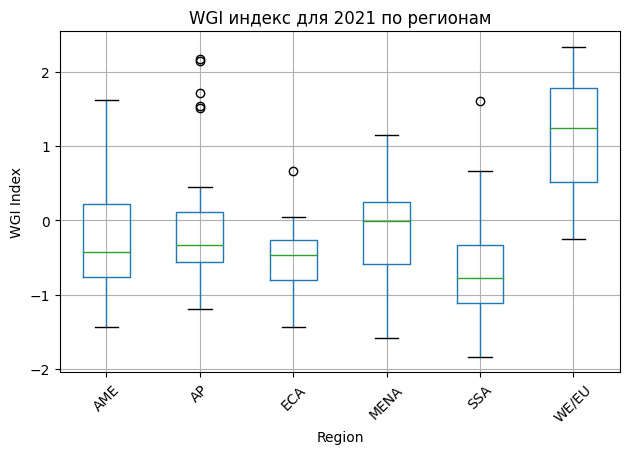

In [132]:
# Совмещаем все DataFrame-ы в один
df = pd.concat(DataFrames.values())
df
# Чертим boxplot
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column='Estimate', by='Region')
plt.title('WGI индекс для 2021 по регионам')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('WGI Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Задача 2. Анализ рынка акций

## Загружаем данные в один dataframe

In [133]:
import os
import pandas as pd

# Путь к загруженному каталогу, содержащему CSV-файлы
folder_path = '/content/stock'

# Инициализирем пустой фрейм данных для хранения данных
combined_df = pd.DataFrame()

# Выполняем итерацию по каждому файлу в каталоге
for file_name in os.listdir(folder_path):
    # Проверяем, является ли файл CSV-файлом
    if file_name.endswith('.csv'):
        # Считываем CSV-файл во фрейм данных
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        promotion_name = os.path.splitext(file_name)[0]

        # Извлекаем столбцы "Date" и "Close" и устанавливаем "Date" в качестве индекса
        df = df[['Date', 'Close']].set_index('Date')

        # Переименуем столбец "Close" в promotion_name
        df.rename(columns={'Close': promotion_name}, inplace=True)

        # Объединяем текущий фрейм данных с объединенным фреймом данных
        combined_df = pd.concat([combined_df, df], axis=1)

# Отображаем объединенный фрейм данных
combined_df


,ADBE,AMZN,NFLX,TCOM,MSFT,GTLB,DBX,NVDA,SPOT,GOOGL,...,UBER,AAPL,TWLO,MU,ABNB,INTC,TSLA,CSCO,HPQ,SHOP
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,534.299988,149.573502,427.140015,26.610001,310.980011,64.010002,24.750000,244.860001,196.259995,135.303497,...,37.400002,174.779999,206.119995,82.269997,153.970001,48.820000,312.239990,55.669998,36.730000,NaN
2022-02-01,467.679993,153.563004,394.519989,25.820000,298.790009,58.270000,22.690001,243.850006,156.190002,135.057007,...,36.029999,165.119995,174.800003,88.860001,151.490005,47.700001,290.143341,55.770000,34.360001,NaN
2022-03-01,455.619995,162.997498,374.589996,23.120001,308.309998,54.450001,23.250000,272.859985,151.020004,139.067505,...,35.680000,174.610001,164.809998,77.889999,171.759995,49.560001,359.200012,55.759998,36.299999,NaN
2022-04-01,395.950012,124.281502,190.360001,23.650000,277.519989,47.930000,21.750000,185.470001,101.650002,114.109497,...,31.480000,157.649994,111.820000,68.190002,153.210007,43.590000,290.253326,48.980000,36.630001,NaN
2022-05-01,416.480011,120.209503,197.440002,22.059999,271.869995,38.939999,20.840000,186.720001,112.769997,113.762001,...,23.200001,148.839996,105.169998,73.839996,120.870003,44.419998,252.753326,45.049999,38.840000,NaN
2022-06-01,366.059998,106.209999,174.869995,27.450001,256.829987,53.139999,20.990000,151.589996,93.830002,108.962997,...,20.459999,136.720001,83.809998,55.279999,89.080002,37.410000,224.473328,42.639999,32.779999,NaN
2022-07-01,410.119995,134.949997,224.899994,25.780001,280.739990,57.400002,22.740000,181.630005,113.019997,116.320000,...,23.450001,162.509995,84.800003,61.860001,110.980003,36.310001,297.149994,45.369999,33.389999,NaN
2022-08-01,373.440002,126.769997,223.559998,25.719999,261.470001,59.869999,21.389999,150.940002,108.150002,108.220001,...,28.760000,157.220001,69.580002,56.529999,113.120003,31.920000,275.609985,44.720001,28.709999,NaN
2022-09-01,275.200012,113.000000,235.440002,27.309999,232.899994,51.220001,20.719999,121.389999,86.300003,95.650002,...,26.500000,138.199997,69.139999,50.099998,105.040001,25.770000,265.250000,40.000000,24.920000,NaN


## Вычисление корреляционной матрицы для всех акций

In [134]:
# Вычисляем корреляционную матрицу
correlation_matrix = combined_df.corr()

# Отображаем корреляционную матрицу
print(correlation_matrix)


           ADBE      AMZN      NFLX      TCOM      MSFT      GTLB       DBX  \
ADBE   1.000000  0.819614  0.821314  0.533298  0.913842  0.496556  0.816359   
AMZN   0.819614  1.000000  0.735466  0.309545  0.838702  0.690644  0.478171   
NFLX   0.821314  0.735466  1.000000  0.766681  0.900263  0.452625  0.635239   
TCOM   0.533298  0.309545  0.766681  1.000000  0.662193  0.103614  0.423136   
MSFT   0.913842  0.838702  0.900263  0.662193  1.000000  0.451366  0.648164   
GTLB   0.496556  0.690644  0.452625  0.103614  0.451366  1.000000  0.402517   
DBX    0.816359  0.478171  0.635239  0.423136  0.648164  0.402517  1.000000   
NVDA   0.802739  0.765294  0.910910  0.787859  0.935386  0.404702  0.519374   
SPOT   0.863827  0.875779  0.920771  0.640120  0.949380  0.540113  0.525305   
GOOGL  0.915440  0.912332  0.717756  0.322718  0.845993  0.535473  0.669228   
META   0.873388  0.830910  0.897908  0.707029  0.966868  0.467641  0.552874   
PINS   0.804657  0.666996  0.930638  0.705551  0.837

## Отобразите корреляционную матрицу в виде диаграммы.

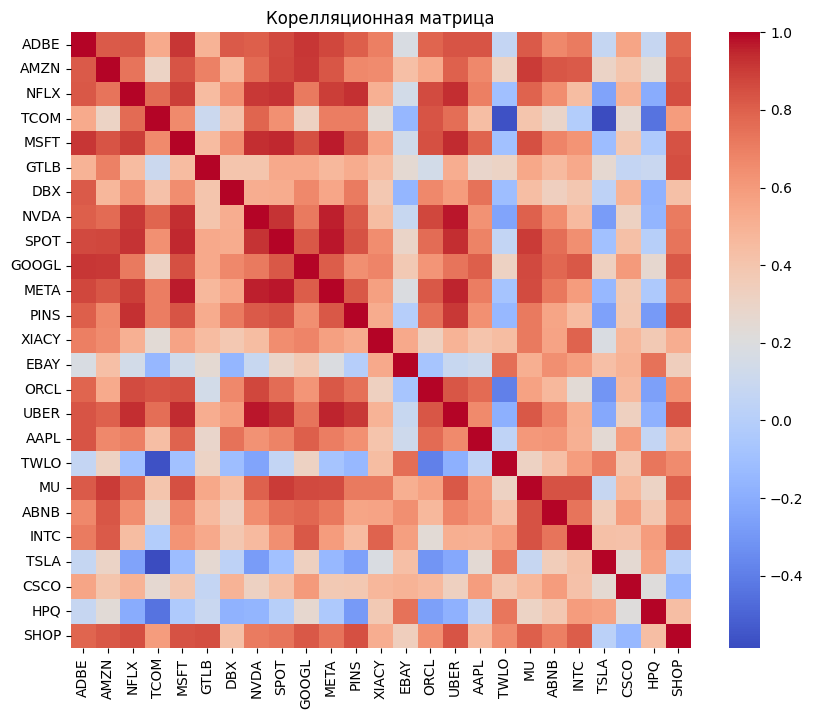

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt


# Рисуем корелляционную матрицу как heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Корелляционная матрица')
plt.show()

## Опроеделение акции с максимальной положительной корреляцией (max)



In [136]:
# Отфильтруем корреляционную матрицу, чтобы включить только корреляции с Netflix (NFLX)
NFLX_correlation = correlation_matrix['NFLX'].drop('NFLX')  # Убирааем самокорреляции с Netflix
# Ищем долю с максимальной положительной корреляцией
max_positive_correlation_stock = NFLX_correlation.idxmax()

print("Самую большую положительную коррелляцию с Netflix (NFLX) имеет:", max_positive_correlation_stock)


Самую большую положительную коррелляцию с Netflix (NFLX) имеет: UBER


## Опроеделение акции с максимальной отрицательной корреляцией (min)

In [137]:
# Находим часть с максимальной отрицательной корреляцией
max_negative_correlation_stock = NFLX_correlation.idxmin()

print("Самую большую Отрицательную коррелляцию с Netflix (NFLX) имеет:", max_negative_correlation_stock)

Самую большую Отрицательную коррелляцию с Netflix (NFLX) имеет: TSLA


## Опроеделение акции с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none)

In [138]:
# Найдите долю с минимальной корреляцией (ближайшей к нулю)
min_correlation_stock = NFLX_correlation.abs().idxmin()

print("Ищем самую близкую к 0 корелляцию с Netflix:", min_correlation_stock)

Ищем самую близкую к 0 корелляцию с Netflix: TWLO


## Постройте диаграммы разброса (Ваша компания - Компания с min), (Ваша компания - Компания с max), (Ваша компания - Компания с none)

In [139]:
# Извлекаем близость Netflix (NFLX) и выбранных компаний
baba_prices = combined_df['NFLX']
max_positive_correlation_prices = combined_df[max_positive_correlation_stock]
max_negative_correlation_prices = combined_df[max_negative_correlation_stock]
min_correlation_prices = combined_df[min_correlation_stock]


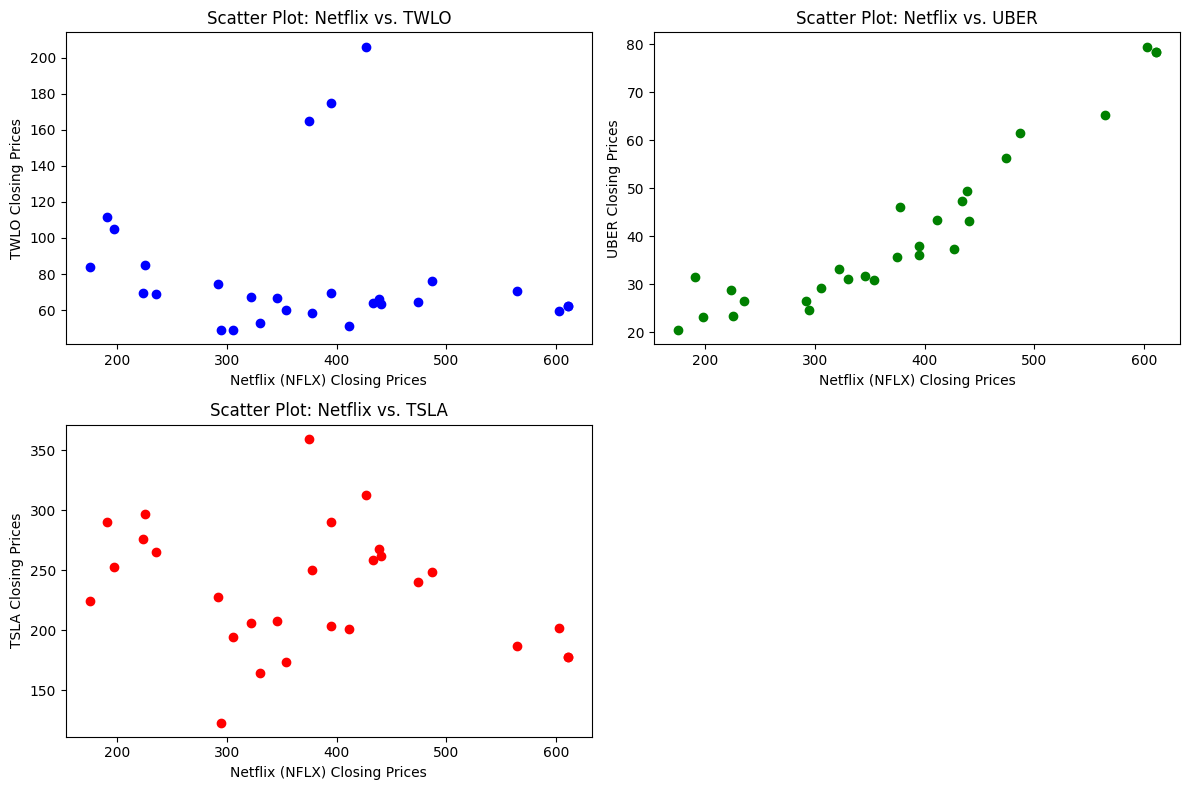

In [140]:
# Создание точечных диаграмм
plt.figure(figsize=(12, 8))

# Точечный график для компании с минимальной корреляцией (ближайшей к нулю)
plt.subplot(2, 2, 1)
plt.scatter(baba_prices, min_correlation_prices, color='blue')
plt.title('Scatter Plot: Netflix vs. ' + min_correlation_stock)
plt.xlabel('Netflix (NFLX) Closing Prices')
plt.ylabel(min_correlation_stock + ' Closing Prices')

# Точечный график для компании с максимальной положительной корреляцией
plt.subplot(2, 2, 2)
plt.scatter(baba_prices, max_positive_correlation_prices, color='green')
plt.title('Scatter Plot: Netflix vs. ' + max_positive_correlation_stock)
plt.xlabel('Netflix (NFLX) Closing Prices')
plt.ylabel(max_positive_correlation_stock + ' Closing Prices')

# Точечный график для компании с максимальной отрицательной корреляцией
plt.subplot(2, 2, 3)
plt.scatter(baba_prices, max_negative_correlation_prices, color='red')
plt.title('Scatter Plot: Netflix vs. ' + max_negative_correlation_stock)
plt.xlabel('Netflix (NFLX) Closing Prices')
plt.ylabel(max_negative_correlation_stock + ' Closing Prices')
plt.tight_layout()
plt.show()

## Рассчитайте среднюю цену акций для каждого месяца (исходные данные взяты с интервалом в месяц)

In [141]:
# Преобразуем индекс в datetime, если он еще не в формате datetime
combined_df.index = pd.to_datetime(combined_df.index)

# # Повторим выборку фрейма данных с месячными интервалами и вычислим среднее значение
monthly_avg_prices = combined_df.resample('M').mean()

# Отобразим средние цены на акции за каждый месяц
print(monthly_avg_prices)


                  ADBE        AMZN        NFLX       TCOM        MSFT  \
Date                                                                    
2022-01-31  534.299988  149.573502  427.140015  26.610001  310.980011   
2022-02-28  467.679993  153.563004  394.519989  25.820000  298.790009   
2022-03-31  455.619995  162.997498  374.589996  23.120001  308.309998   
2022-04-30  395.950012  124.281502  190.360001  23.650000  277.519989   
2022-05-31  416.480011  120.209503  197.440002  22.059999  271.869995   
2022-06-30  366.059998  106.209999  174.869995  27.450001  256.829987   
2022-07-31  410.119995  134.949997  224.899994  25.780001  280.739990   
2022-08-31  373.440002  126.769997  223.559998  25.719999  261.470001   
2022-09-30  275.200012  113.000000  235.440002  27.309999  232.899994   
2022-10-31  318.500000  102.440002  291.880005  22.629999  232.130005   
2022-11-30  344.929993   96.540001  305.529999  31.950001  255.139999   
2022-12-31  336.529999   84.000000  294.880005  34.

## Постройте графики для акций из пункта 4 и средней из пункта 6.

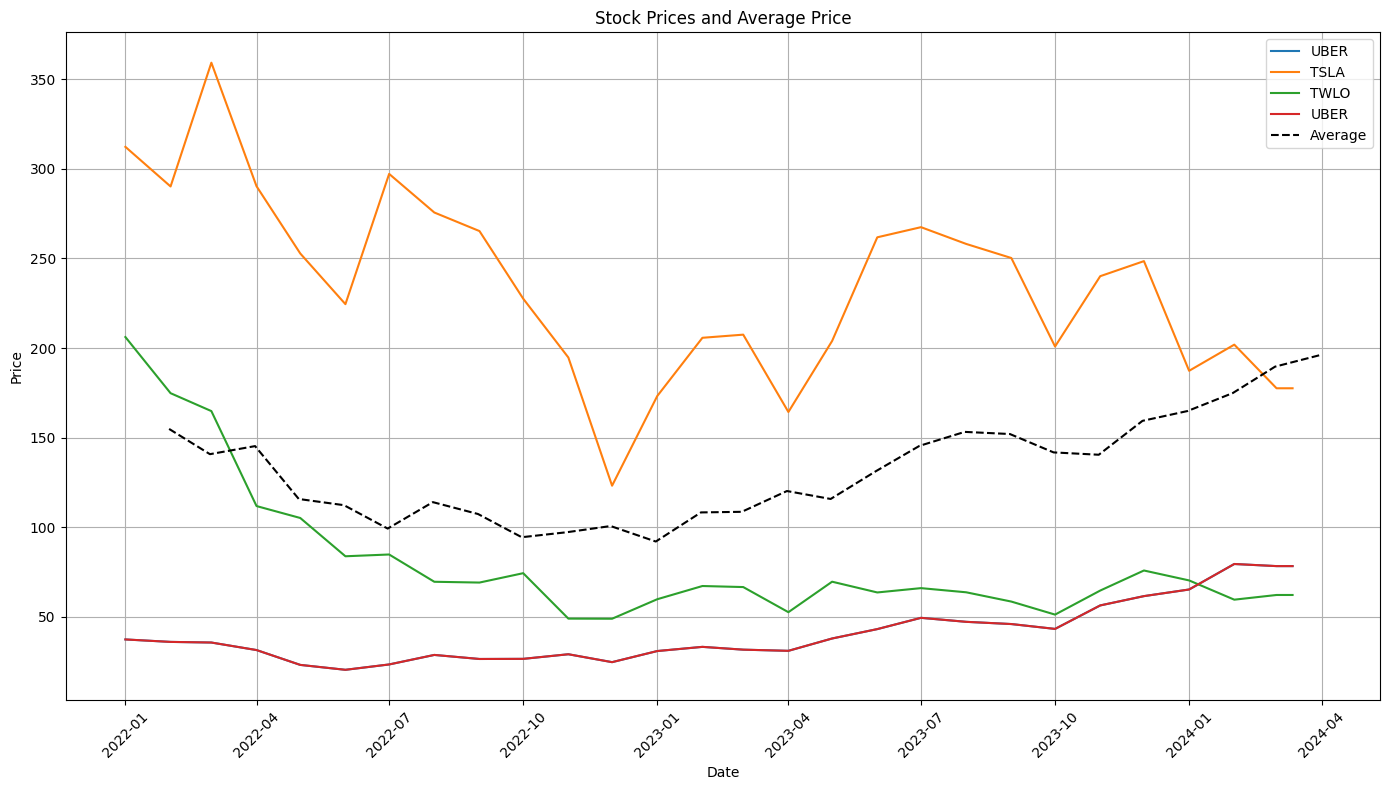

In [142]:
import matplotlib.pyplot as plt

# Построение графика цен на отдельные акции и средних цен на акции за каждый месяц
plt.figure(figsize=(14, 8))

# Построение графиков цен на отдельные акции
for stock in [max_positive_correlation_stock, max_negative_correlation_stock, min_correlation_stock,"UBER"]:
    plt.plot(combined_df.index, combined_df[stock], label=stock)

# Построение графика средних цен на акции за каждый месяц
plt.plot(monthly_avg_prices.index, monthly_avg_prices.mean(axis=1), color='black', linestyle='--', label='Average')

# Добавление метки и заголовок
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices and Average Price')
plt.legend()
plt.grid(True)

# рисуем график
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Вывод
###В процессе выполнения домашнего задания были изучены библиотеки pandas и matplotlib и их применение в практических задачах на примере задач дескриптивного анализа данных.

# Дополнительное задание

- выведите круговую диаграмму (pie) с количеством стран для каждого региона
- постройте гистограмму по estimate за последний год с количеством бинов = 15. добавьте к ней вертикальные линии для среднего и РФ

In [143]:
regions

,Country,Code,Region
0,Afghanistan,AFG,AP
1,Albania,ALB,ECA
2,Algeria,DZA,MENA
3,Angola,AGO,SSA
4,Argentina,ARG,AME
...,...,...,...
175,Venezuela,VEN,AME
176,Vietnam,VNM,AP
177,Yemen,YEM,MENA
178,Zambia,ZMB,SSA


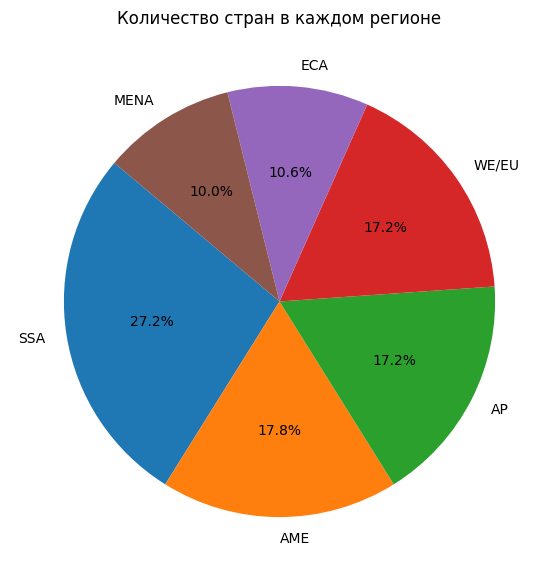

In [144]:
# Подсчет количества стран в каждом регионе
region_counts = regions['Region'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(10, 7))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Количество стран в каждом регионе')
plt.show()

постройте гистограмму по estimate за последний год с количеством бинов = 15. добавьте к ней вертикальные линии для среднего и РФ

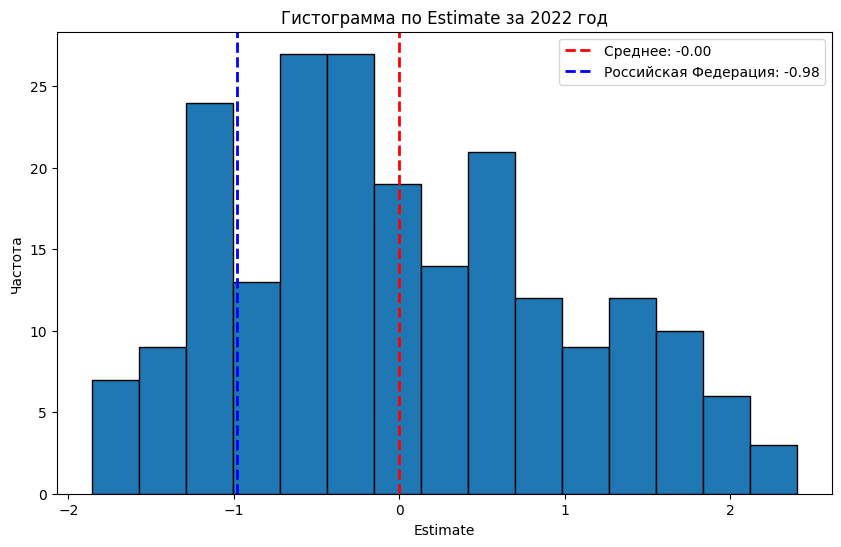

In [146]:
# Отфильтровать данные за последний год
last_year = wgidataset['Year'].max()
df_last_year = wgidataset[wgidataset['Year'] == last_year]

# Построить гистограмму по Estimate с количеством бинов = 15
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_last_year['Estimate'].dropna(), bins=15, edgecolor='black')

# Добавить вертикальные линии для среднего значения и для значения Russian Federation
mean_estimate = df_last_year['Estimate'].mean()
russian_estimate = df_last_year[df_last_year['Country/Territory'] == 'Russian Federation']['Estimate'].values[0]

plt.axvline(mean_estimate, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_estimate:.2f}')
plt.axvline(russian_estimate, color='blue', linestyle='dashed', linewidth=2, label=f'Российская Федерация: {russian_estimate:.2f}')

# Настройка легенды и заголовка
plt.legend()
plt.title(f'Гистограмма по Estimate за {last_year} год')
plt.xlabel('Estimate')
plt.ylabel('Частота')
plt.show()